In [174]:
import torch 
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

## Train model

In [ ]:
#console to train model
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 8

## Load model

In [175]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp6/weights/best.pt')

Using cache found in C:\Users\bacco/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-5-18 Python-3.10.11 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


requirements: C:\Users\bacco\Desktop\Master\SS2023\AI_NN\RPS_Yolo\rpsyolo\Lib\site-packages\requirements.txt not found, check failed.


### Testimage, results and rendering

In [176]:
img = os.path.join('yolov5','data','images','test.jpg')
img= cv2.imread(img)

In [184]:
results = model(img)

In [185]:
results.print()

image 1/1: 480x640 1 Scissor
Speed: 2.5ms pre-process, 82.7ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


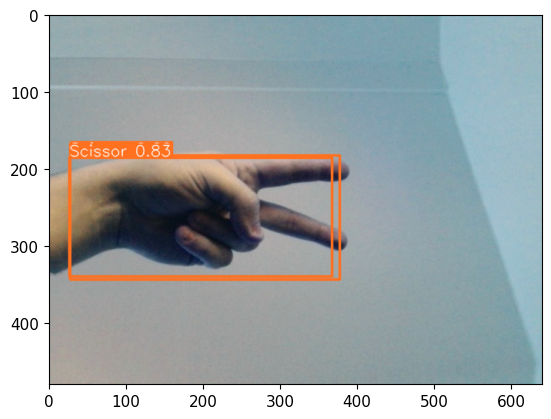

In [186]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

## Game implementation

In [151]:
#Function for gamelogic
RPS= {'Rock':'Scissor','Scissor':'Paper','Paper':'Rock'}
def rps(player1,player2):
    if player1 == player2:
        return 'Tie'
    elif player2 in RPS[player1]:
        return 'Player1 wins!' 
    else:
        return 'Player2 wins!'

In [181]:
#set variables for for the cv2 window and start capturing
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
player1_line = int(width*0.35)
player2_line = int(width*0.65)
labeldic={0:'Paper',1:'Rock',2:'Scissor'}
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.85
font_color = (255, 255, 255) # weiß
testcounter=0
text=""
player1=""
player2=""

### Play Rock-Paper-Scissor infron of webcam:

In [182]:
while cap.isOpened():
    #send captured frame through model
    ret, frame = cap.read()
    frame = cv2.flip(frame,1)
    results = model(frame)
    
    #reset players
    player1=""
    player2=""
    
    #get labels and coordinates of detections
    labels, cords = results.xyxyn[0][:,5].numpy(),results.xyxyn[0][:, :-1].numpy() 
    
    #set textposition and size for frame
    text_size = cv2.getTextSize(text, font, font_scale, 1)[0]
    text_x_main = int((frame.shape[1] - text_size[0]) / 2) 
    text_x_player1 = int((frame.shape[1] - text_size[0]) / 6) 
    text_x_player2 = int((frame.shape[1] - text_size[0]) /1) 
    text_y = int(text_size[1] * 1.5)
    
    #logic to play game and render results accordingly
    if len(labels) == 2:
        cords1=results.xyxyn[0][:, :-1].numpy()[0]
        cords2=results.xyxyn[0][:, :-1].numpy()[1]
        if cords1[2] < cords2[0]:
            player1 = labeldic[results.xyxyn[0][:,5].numpy()[0]]
            player2 = labeldic[results.xyxyn[0][:,5].numpy()[1]]
            gameresult =rps(player1,player2)
        else:
            player1 = labeldic[results.xyxyn[0][:,5].numpy()[1]]
            player2 = labeldic[results.xyxyn[0][:,5].numpy()[0]]
        text=f'Player1:{player1} {gameresult}   Player2:{player2}'
    elif len(labels) >2:
        text="Too many detections"
    else:
        text="Start playing"
    
    #display player lines and gametext
    cv2.line(frame, (player1_line,0),(player1_line,height),(0,0,255),2)
    cv2.line(frame, (player2_line,0),(player2_line,height),(0,0,255),2)
    cv2.putText(frame, text, (text_x_main, text_y), font, font_scale, font_color, 2, cv2.LINE_AA)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    #stop playing with 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break
cap.release()
cv2.destroyAllWindows()